In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets.mnist import load_data as load_mnist


mnist = load_mnist()
((x_train, y_train), (x_test, y_test)) =  mnist

# Alegem un numar pe care sa il genereze - 7

In [3]:
NR_DE_GENERAT = 7

In [4]:
imagini_cu_7  = x_train[y_train == NR_DE_GENERAT]
imagini_cu_7.shape

(6265, 28, 28)

In [5]:
x_train.shape

(60000, 28, 28)

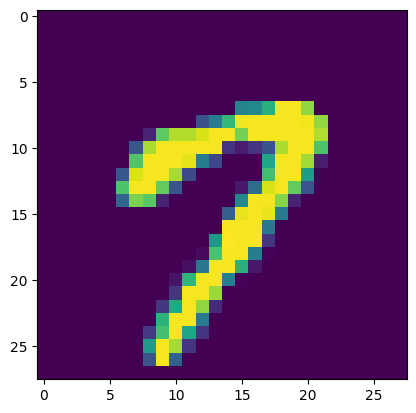

In [6]:
plt.imshow(imagini_cu_7[0])

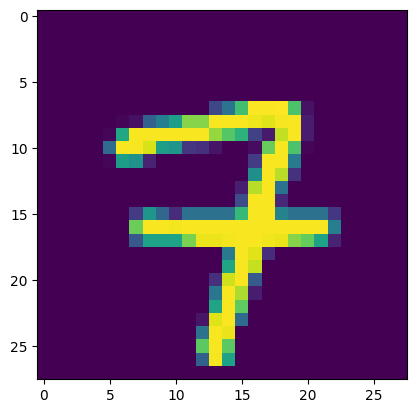

In [7]:
plt.imshow(imagini_cu_7[32])

In [8]:
generator = tf.keras.models.Sequential([ ])
discriminator = tf.keras.models.Sequential([ ])

# Pas 1 - crearea discriminatorului pentru a clasifica imagini

In [9]:
generator = tf.keras.models.Sequential([

])
discriminator = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Pas 2 - crearea generatorului in oglinda cu discriminatorul

In [18]:
28 * 28

784

In [10]:
generator = tf.keras.models.Sequential([


      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(28 * 28, activation='sigmoid'),   # 28 * 28 = 784
      tf.keras.layers.Reshape((28, 28))

])
discriminator = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(), # [[], []] -> []
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Discriminatorul - zice e bine sau nu (binary - sunt 2 clase)

In [11]:
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Crearea unui GAN -> Generative Adversarial Network

In [12]:
GAN = tf.keras.models.Sequential([
    generator,
    discriminator
])

In [13]:
discriminator.trainable = False

In [14]:
GAN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
GAN.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_5 (Sequential)       │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
GAN.layers

[<Sequential name=sequential_4, built=False>,
 <Sequential name=sequential_5, built=False>]

In [17]:
GAN.layers[0].summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
imagini_cu_7.shape

(6265, 28, 28)

In [20]:
batch_size = 32

In [21]:
type(imagini_cu_7)

numpy.ndarray

In [22]:
tf.data.Dataset.from_tensor_slices(imagini_cu_7)

<_TensorSliceDataset element_spec=TensorSpec(shape=(28, 28), dtype=tf.uint8, name=None)>

In [24]:
dataset = tf.data.Dataset.from_tensor_slices(imagini_cu_7)
dataset, type(dataset)

(<_TensorSliceDataset element_spec=TensorSpec(shape=(28, 28), dtype=tf.uint8, name=None)>,
 tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset)

In [25]:
new_dataset = dataset.batch(batch_size = 32, drop_remainder=True).prefetch(1)
new_dataset, type(new_dataset)

(<_PrefetchDataset element_spec=TensorSpec(shape=(32, 28, 28), dtype=tf.uint8, name=None)>,
 tensorflow.python.data.ops.prefetch_op._PrefetchDataset)

In [27]:
EPOCHS = 20

for epoch in range(EPOCHS):
  print(f"Suntem in epoca {epoch}")
  for batch in new_dataset:
    noise = tf.random.normal(shape=(batch_size, 100))
    fake_images = generator(noise)

    x_fake_and_real = tf.concat ([fake_images, tf.dtypes.cast(batch, tf.float32)], axis=0)
    y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)

    discriminator.trainable = True
    discriminator.train_on_batch(x_fake_and_real, y1)

    discriminator.trainable = False

    noise = tf.random.normal(shape=(batch_size, 100))
    y2 = tf.constant([[1.]] * batch_size)

    ## Train on batch -> generator
    GAN.train_on_batch(noise, y2)


Suntem in epoca 0
Suntem in epoca 1
Suntem in epoca 2
Suntem in epoca 3
Suntem in epoca 4
Suntem in epoca 5
Suntem in epoca 6
Suntem in epoca 7
Suntem in epoca 8
Suntem in epoca 9
Suntem in epoca 10
Suntem in epoca 11
Suntem in epoca 12
Suntem in epoca 13
Suntem in epoca 14
Suntem in epoca 15
Suntem in epoca 16
Suntem in epoca 17
Suntem in epoca 18
Suntem in epoca 19


In [39]:
noise = tf.random.normal(shape=(10, 100))

generated_images = generator( noise)
generated_images.shape

TensorShape([10, 28, 28])

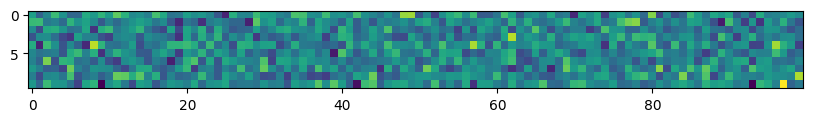

In [37]:
plt.imshow(noise)


In [34]:
plt.rcParams['figure.figsize'] = [10, 20]

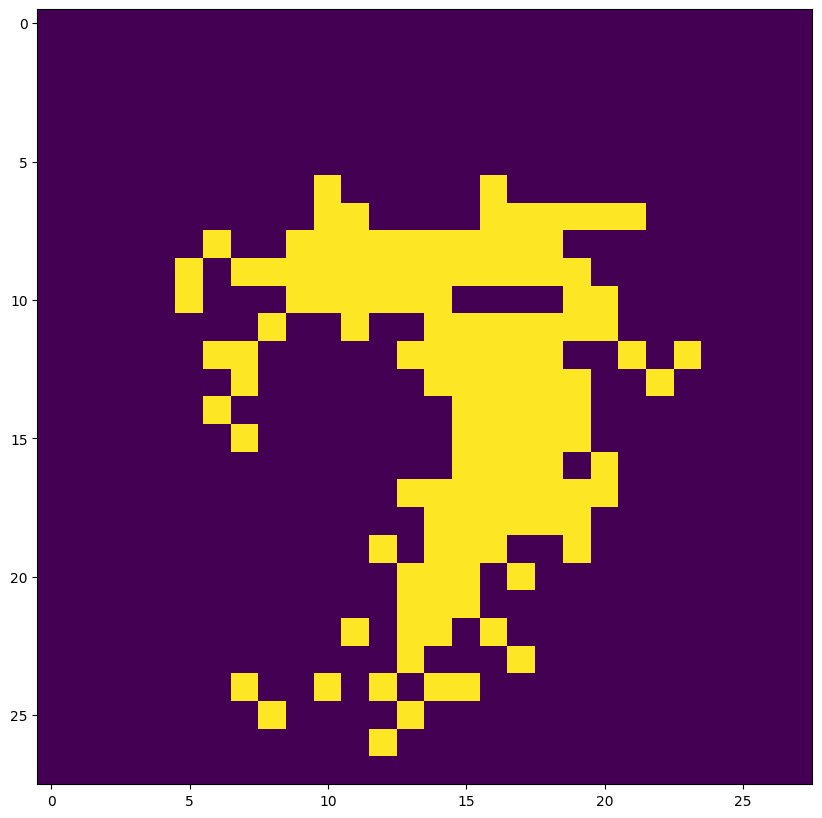

In [41]:
first_generated_image = generated_images[0]
plt.imshow(first_generated_image)

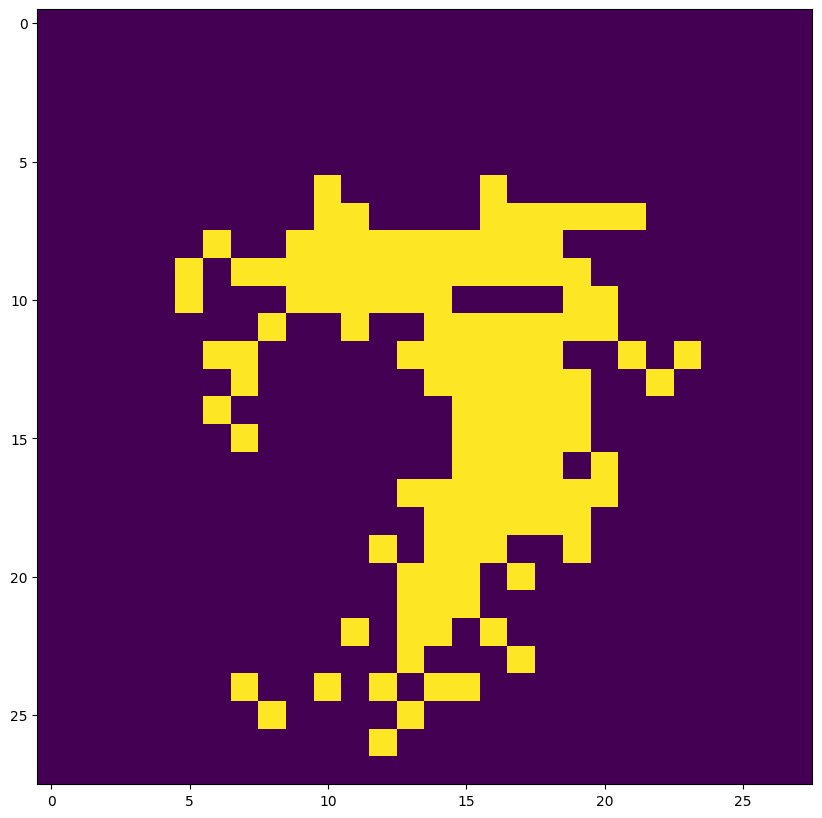

In [42]:
second_generated_image = generated_images[1]
plt.imshow(second_generated_image)

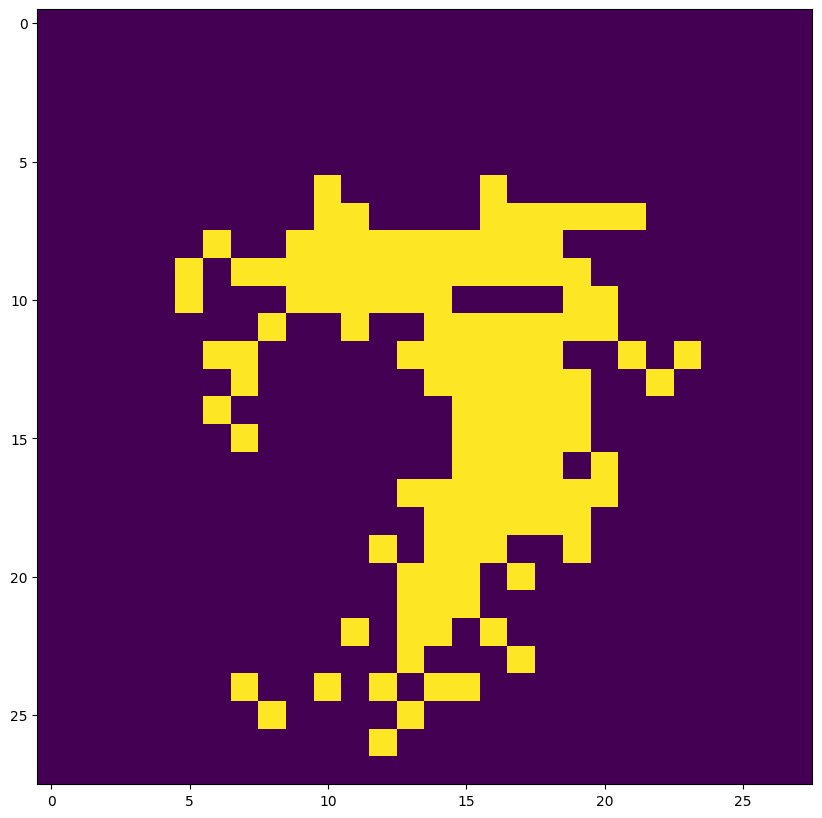

In [43]:
second_generated_image = generated_images[2]
plt.imshow(second_generated_image)

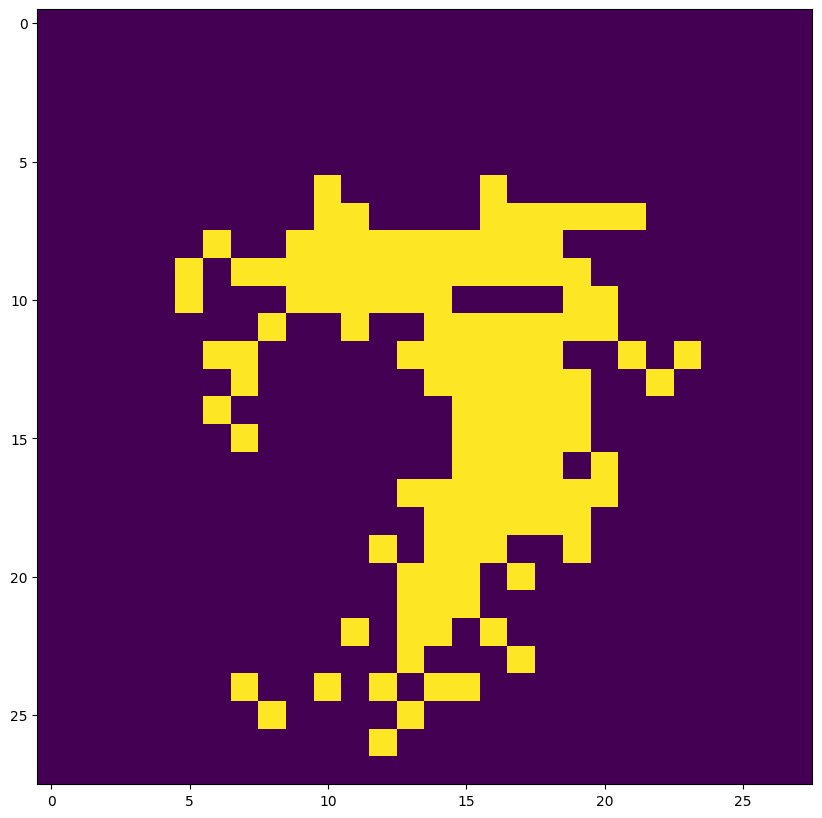

In [44]:
second_generated_image = generated_images[3]
plt.imshow(second_generated_image)